Fine tuning


In [2]:
from keras.applications import VGG16
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.layers import Flatten, Dense, Dropout
%matplotlib inline
import tensorflow as tf

vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape= (224, 224, 3))

58889256/58889256 [==============================] - 3s 0us/step


0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


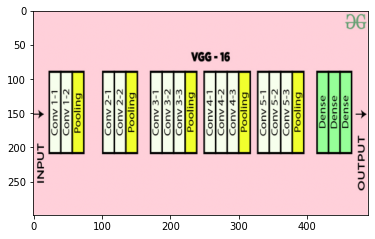

In [3]:
for layer in vgg_model.layers[:15]:
  layer.trainable = False

#to see which got frozen
for i , layer in enumerate(vgg_model.layers):
  print(i , layer.name , layer.trainable)

#only last layers are left trainable 
img = resize(plt.imread('/content/drive/MyDrive/conv-layers-vgg16.jpg'), (299,490))
plt.imshow(img)
plt.show()

In [4]:
from keras.layers.regularization.dropout import Dropout
from tensorflow.keras import layers, models, Model, optimizers

x = vgg_model.output
x = Flatten()(x) #flatten dimmensions 
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(10, activation= 'softmax')(x)
x = Dense(1, activation = 'sigmoid')(x)
tuned_model = Model(inputs = vgg_model.input, outputs = x)

In [6]:
import glob 
import os
import cv2
import numpy as np
from numpy import asarray
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
# from keras.preprocessing.image import img_to_array 
from tensorflow.keras.utils import img_to_array


X = []
Y = []
# count = 
for fname in os.listdir('/content/drive/MyDrive/train/')[:1000]:
  y = 0.0
  if fname.startswith("cat"):
    y = 1.0
  img = load_img("/content/drive/MyDrive/train/" + fname, target_size=(224,224))
  img = img_to_array(img)
  Y.append(y)
  X.append(img)
  # plt.imshow(img)
  # plt.show()
# X = asarray(X).astype('float32')
# Y = asarray(Y)
# images = glob.glob(folder_name)
# img1 = cv2.imread(images[0])
for fname in os.listdir('/content/drive/MyDrive/train/')[15000:16000]:
  y = 0.0
  if fname.startswith("cat"):
    # y = 1.0
    continue
  img = load_img("/content/drive/MyDrive/train/" + fname, target_size=(224,224))
  img = img_to_array(img)
  Y.append(y)
  X.append(img)

In [7]:
# X = np.concatenate(X) 

  # plt.imshow(img)
  # plt.show()
X = asarray(X).astype('float32')
Y = asarray(Y)

In [8]:
# X = np.array(X)
X.shape
# tuned_model.summery()

(2000, 224, 224, 3)

In [9]:
Y


array([1., 1., 1., ..., 0., 0., 0.])

In [11]:


learning_rate = 5e-5
X = np.array(X)
Y =np.array(Y).astype('float32')
tuned_model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(learning_rate = learning_rate), metrics = ["accuracy"])
# history = tuned_model.fit(X, y, batch_size = 15, epochs = 50)


In [12]:
history = tuned_model.fit(X,Y, batch_size = 64, epochs = 10, validation_split= 0.2)

Epoch 1/10
25/25 [==============================] - 27s 498ms/step - loss: 0.6345 - accuracy: 0.6569 - val_loss: 0.6737 - val_accuracy: 0.5450
Epoch 2/10
25/25 [==============================] - 11s 427ms/step - loss: 0.5094 - accuracy: 0.8625 - val_loss: 0.5647 - val_accuracy: 0.7450
Epoch 3/10
25/25 [==============================] - 11s 434ms/step - loss: 0.4823 - accuracy: 0.9025 - val_loss: 0.5183 - val_accuracy: 0.8200
Epoch 4/10
25/25 [==============================] - 11s 439ms/step - loss: 0.4661 - accuracy: 0.9281 - val_loss: 0.4814 - val_accuracy: 0.8800
Epoch 5/10
25/25 [==============================] - 11s 434ms/step - loss: 0.4728 - accuracy: 0.9187 - val_loss: 0.4380 - val_accuracy: 0.9400
Epoch 6/10
25/25 [==============================] - 11s 426ms/step - loss: 0.4562 - accuracy: 0.9413 - val_loss: 0.4498 - val_accuracy: 0.9275
Epoch 7/10
25/25 [==============================] - 11s 424ms/step - loss: 0.4425 - accuracy: 0.9619 - val_loss: 0.4096 - val_accuracy: 0.9900

In [ ]:
classes = ['dog', 'cat']
fname = "1.jpg"
# img = load_img("/content/drive/MyDrive/" + fname, target_size=(224,224))
img = resize(plt.imread("/content/drive/MyDrive/" + fname), (224,224))

img = img_to_array(img)

img.shape
# pred = tuned_model.predict(img)
# print(classes[pred])
a = np.expand_dims(img, axis=0)
res = tuned_model(a)
i = res.numpy().tolist()
np.squeeze(i)
for im in i:
 print(classes[round(im[0])])

cat


In [13]:
X_test = []
Y_test = []
# count = 
for fname in os.listdir('/content/drive/MyDrive/train/')[1100:1600]:
  y = 0.0
  if fname.startswith("cat"):
    y = 1.0
  img = load_img("/content/drive/MyDrive/train/" + fname, target_size=(224,224))
  img = img_to_array(img)
  Y_test.append(y)
  X_test.append(img)
  # plt.imshow(img)
  # plt.show()
# X = asarray(X).astype('float32')
# Y = asarray(Y)
# images = glob.glob(folder_name)
# img1 = cv2.imread(images[0])
for fname in os.listdir('/content/drive/MyDrive/train/')[18000:18500]:
  y = 0.0
  if fname.startswith("cat"):
    # y = 1.0
    continue
  img = load_img("/content/drive/MyDrive/train/" + fname, target_size=(224,224))
  img = img_to_array(img)
  Y_test.append(y)
  X_test.append(img)

In [16]:
X_test = asarray(X_test).astype('float32')
Y_test =np.array(Y_test).astype('float32')


In [17]:
classes = ['dog', 'cat']

pred = tuned_model.predict(X_test)


32/32 [==============================] - 9s 182ms/step


In [30]:
count = 0
for i in range(len(Y_test)):
  if Y_test[i] == round(pred[i][0]):
    # print(Y)
    count += 1
print(count/len(Y_test)*100)

96.3


In [28]:
np.concatenate(pred)
pred[0][0]

0.6552131

In [32]:
tuned_model.save('Model_v01')